# Student name: Feiyang Li

# Student ID: 23202564

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import pandas as pd
from sklearn.metrics import accuracy_score

# Task 1a

These functions are provided to assist you in Task 1a

In [2]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [3]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

First load the dataset and look at its structure：

In [4]:
training_data_path = '/content/Et2_Classification_TrainingData.csv'
testing_data_path = '/content/Et2_Classification_TestData.csv'

train_df = pd.read_csv(training_data_path)
test_df = pd.read_csv(testing_data_path)


train_df.head(), test_df.head()


(   6.548619464914965382e-01  3.268622972210979971e-01  \
 0                  0.910476                 -0.076881   
 1                 -0.001699                 -0.823829   
 2                  0.445977                 -0.670031   
 3                  0.458449                  0.576294   
 4                 -0.690134                 -0.431948   
 
    1.000000000000000000e+00  
 0                      -1.0  
 1                       1.0  
 2                       1.0  
 3                       1.0  
 4                       1.0  ,
    -4.892640899856989245e-01  5.563356890249659958e-01  \
 0                   0.053777                 -0.889851   
 1                  -0.362713                  0.688486   
 2                   0.458583                 -0.488764   
 3                   0.783507                  0.216594   
 4                   0.026664                  1.007801   
 
    1.000000000000000000e+00  
 0                      -1.0  
 1                       1.0  
 2            

In [5]:
col_names = ['Feature1', 'Feature2']
train_df.columns = col_names + ['Target']
test_df.columns = col_names + ['Target']

Separation of characteristics and target variables

In [6]:
X_train = train_df[col_names]
y_train = train_df['Target']
X_test = test_df[col_names]
y_test = test_df['Target']

Training the initial logistic regression model

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial model accuracy: {accuracy}")

Initial model accuracy: 0.41379310344827586


### Analyse the reasons
The reason this result may be disappointing may be that logistic regression is a linear model , and the data may not be linearly separable. If the categories in the dataset cannot be effectively separated by a linear decision boundary, then logistic regression may not perform well.

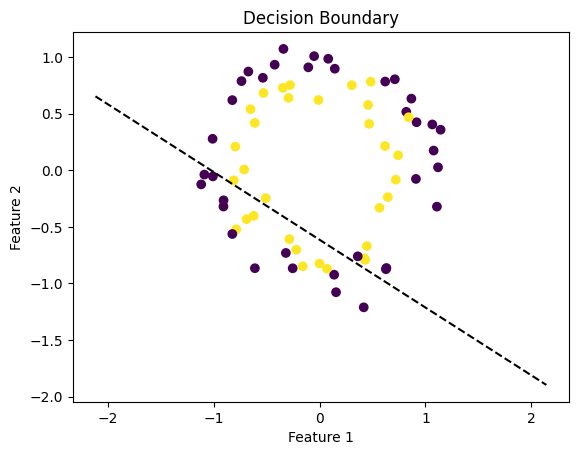

In [8]:
weights = np.hstack((lr_model.intercept_, lr_model.coef_[0]))
x_min, x_max = X_train['Feature1'].min() - 1, X_train['Feature1'].max() + 1
y_min, y_max = decision_boundary(weights, x_min, x_max)

plt.plot([x_min, x_max], [y_min, y_max], 'k--')
plt.scatter(X_train['Feature1'], X_train['Feature2'], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

As can be seen from the visualisation of the decision boundaries, current logistic regression models may not be able to capture complex patterns in the data, resulting in low accuracy. This may be due to the fact that the data itself contains non-linear relationships and logistic regression, as a linear model, struggles to deal with non-linearly differentiable data.

### Improvements
To improve classification performance, I tried feature engineering, as well as experimenting with different data transformations: exploring different manual transformations, such as squared features, to see if they could improve the performance of the model.

- squared

In [9]:
X_train_squared = X_train.copy()
X_test_squared = X_test.copy()
for col in col_names:
    X_train_squared[col + '_squared'] = X_train[col] ** 2
    X_test_squared[col + '_squared'] = X_test[col] ** 2

lr_model_squared = LogisticRegression()
lr_model_squared.fit(X_train_squared, y_train)
y_pred_squared = lr_model_squared.predict(X_test_squared)

accuracy_squared = accuracy_score(y_test, y_pred_squared)
print(f"Improved model accuracy with squared features: {accuracy_squared}")

Improved model accuracy with squared features: 0.896551724137931


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


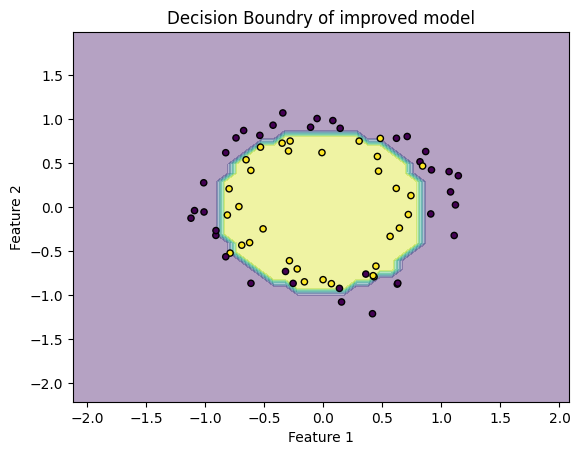

In [10]:
x_min, x_max = X_train['Feature1'].min() - 1, X_train['Feature1'].max() + 1
y_min, y_max = X_train['Feature2'].min() - 1, X_train['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

X_grid = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2]

Z = lr_model_squared.predict(X_grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train['Feature1'], X_train['Feature2'], c=y_train, edgecolor='k', s=20)
plt.title('Decision Boundry of improved model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- cubed

In [11]:
X_train_cubed = X_train.copy()
X_test_cubed = X_test.copy()
for col in col_names:
    X_train_cubed[col + '_cubed'] = X_train[col] ** 3
    X_test_cubed[col + '_cubed'] = X_test[col] ** 3

lr_model_cubed = LogisticRegression()
lr_model_cubed.fit(X_train_cubed, y_train)
y_pred_cubed = lr_model_cubed.predict(X_test_cubed)

accuracy_cubed = accuracy_score(y_test, y_pred_cubed)
print(f"Improved model accuracy with cubed features: {accuracy_cubed}")


Improved model accuracy with cubed features: 0.41379310344827586


- pow4

In [12]:
X_train_pow4 = X_train.copy()
X_test_pow4 = X_test.copy()
for col in col_names:
    X_train_pow4[col + '_pow4'] = X_train[col] ** 4
    X_test_pow4[col + '_pow4'] = X_test[col] ** 4

lr_model_pow4 = LogisticRegression()
lr_model_pow4.fit(X_train_pow4, y_train)
y_pred_pow4 = lr_model_pow4.predict(X_test_pow4)

accuracy_pow4 = accuracy_score(y_test, y_pred_pow4)
print(f"Improved model accuracy with pow4 features: {accuracy_pow4}")

Improved model accuracy with pow4 features: 0.8275862068965517


## Reflection

After engaging with your peers, reflect on this task and answer the following questions:
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

- Model complexity refers to the ability of the model to fit the data. In general, the higher the model complexity, the better its performance (i.e., Ein, or training error) on the training set. However, if the model is too complex and exceeds the complexity of the data itself, it can lead to overfitting, i.e., the model performs well on the training set (low Ein) but performs poorly on the test set or unseen new data (high Eout, i.e., test error).

- Suppose there is a bunch of red and blue balls mixed together, and the task now is to separate them with a stick (the linear tool). This is difficult to do if the balls are arranged in a jumbled way. But if the balls can be rearranged according to certain rules (data transformation), such as moving all the red balls to one side and the blue balls to the other, then separating them with a stick becomes easy. In data science, if the raw data is not easily distinguishable from different categories using a linear model, changing the representation of the data in some way (e.g., increasing the dimensionality of the data) may make it easy to separate these categories by a straight line.

- Going back to the example of playing a game, if the rules of the game allowed players to change the presentation of clues based on their preferences (data transformation), this would certainly make the game more interesting, but it could also make the rules more complex. Similarly, in machine learning, by transforming data, we can help models understand the data better and improve their accuracy. But this also means that the model needs to learn more (because the transformed data may have added new features), which makes the model more complex. The more complex the model, the more likely it is that it will learn not only patterns in the data, but also extraneous noise, which is like the rules of the game becoming so complex that the players start to lose their way. So we need to find a balance between helping the model understand the data better through data transformations, but not letting the model become too complex to grasp.

# Task 1b

In [13]:
# def weights(X,y):
#     '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
#     # add bias 1 to inputs X
#     X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
#     # Calculation of weights using pseudo-inverse.
#     return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [14]:
# def linreg_predict(w,X):
#     ''' Returns a prediction y for data point X for a linear regression described by weights w '''
#     # add bias 1 to inputs X
#     X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

#     # Calculation of outputs given weights and data (X).
#     out=[]
#     for x in X:
#         out.append(w.T.dot(x))
#     return np.array(out)

In [15]:
# def calc_error(w,X,y):
#     # Calculate the error as the mean squared error
#     pred = linreg_predict(w,X)
#     return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [16]:
# def transPoly(X, power):
#     if X.ndim == 1:
#         X = X.reshape(-1, 1)

#     extra = [np.hstack([x**p for p in range(2, power+1)]) for x in X]

#     return np.hstack((X, np.array(extra)))

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [17]:
# error_in = []
# error_out = []
# repeats = 100
# low_powers = 5
# high_powers = 10 + 1
# power_range = range(low_powers, high_powers)

# for power in power_range:
#     e_in = 0
#     e_out = 0
#     for r in range(repeats):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#         X_train_trans = transPoly(X_train, power)
#         X_test_trans = transPoly(X_test, power)
#         w = weights(X_train_trans, y_train)
#         e_in += calc_error(w, X_train_trans, y_train)
#         e_out += calc_error(w, X_test_trans, y_test)
#     error_in.append(e_in / repeats)
#     error_out.append(e_out / repeats)

Please add cells according to your own requirements.

In [18]:
# data = pd.read_csv('/content/ET2_Regression_Data.csv')
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values

根据模型复杂度（多项式次数）绘制Ein和Eout

In [19]:
# plt.plot(power_range, error_in, label='Ein')
# plt.plot(power_range, error_out, label='Eout')
# plt.xlabel('多项式次数')
# plt.ylabel('均方误差')
# plt.legend()
# plt.show()

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity?

Your reflection..

# Task 2

In [20]:
data = pd.read_csv('/content/ET2_Regression_Data.csv')

Below is an implementation of linear regression with regularization

In [21]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

In [22]:
def transPoly(X, power):
    # Extend the data in X with dimensions [N,1] with powers of the feature up to 'power'
    X=X.reshape(-1,1)
    extra=[]
    for x in X[:,0]:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

In [23]:
def calc_error(w, X, y):
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    predictions = X.dot(w)
    error = np.mean((predictions - y) ** 2)
    return error

In [24]:
# Splitting data into features and target
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

X_transformed = transPoly(X, 50)

X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((79, 50), (20, 50), (79,), (20,))

In [25]:
from sklearn.metrics import mean_squared_error
# Trying various regularization parameters
l_values = np.logspace(-8, 1, 1000)  # Generating 1000 values for l
errors_train = []
errors_val = []

for l in l_values:
    w = weights_reg(X_train, y_train, l)
    errors_train.append(calc_error(w, X_train, y_train))
    errors_val.append(calc_error(w, X_val, y_val))

# Finding the optimal l
min_error_val = min(errors_val)
optimal_l = l_values[errors_val.index(min_error_val)]

optimal_l, min_error_val


(0.007479522515621813, 0.022946039601224426)

- Plotting model performance vs λ

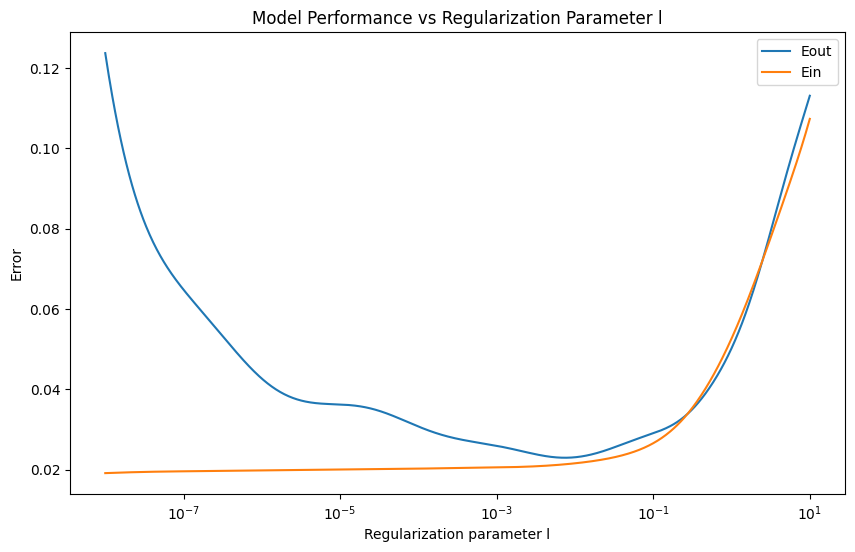

In [26]:
plt.figure(figsize=(10, 6))
plt.semilogx(l_values, errors_val, label='Eout')
plt.semilogx(l_values, errors_train, label='Ein')
plt.xlabel('Regularization parameter l')
plt.ylabel('Error')
plt.legend()
plt.title('Model Performance vs Regularization Parameter l')
plt.show()

- Plotting overfitted, optimal λ and underfitted models

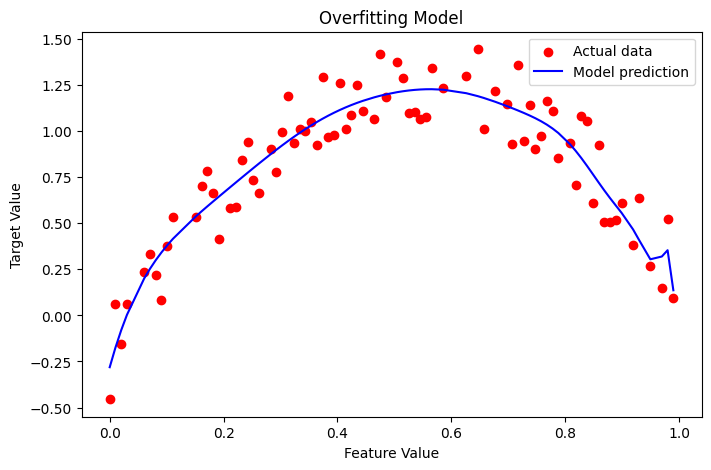

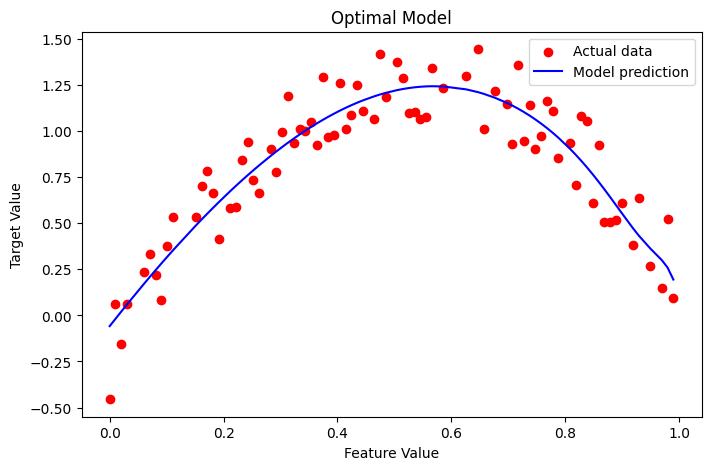

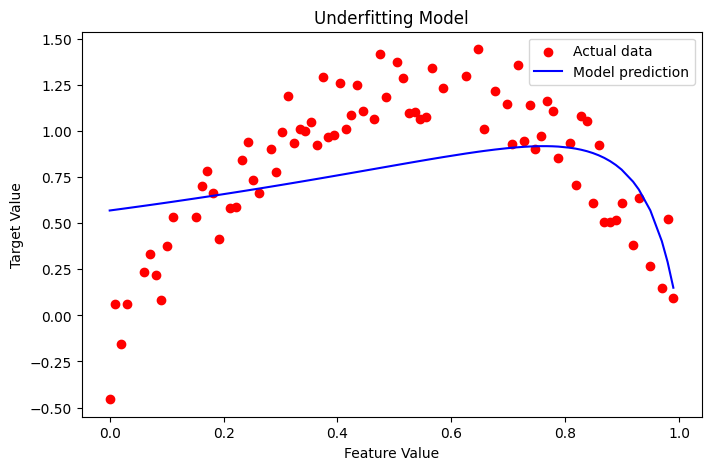

In [27]:
def plot_model_predictions(X, y, w, title):
    X_with_bias = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X[:,0], X_with_bias.dot(w)), key=sort_axis)
    X_sorted, y_pred_sorted = zip(*sorted_zip)

    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], y, color='red', label='Actual data')
    plt.plot(X_sorted, y_pred_sorted, color='blue', label='Model prediction')
    plt.xlabel('Feature Value')
    plt.ylabel('Target Value')
    plt.title(title)
    plt.legend()
    plt.show()
import operator

l_overfitting = l_values[0]  # Small l value
l_underfitting = l_values[-1]  # Large l value
l_optimal = optimal_l

w_overfitting = weights_reg(X_train, y_train, l_overfitting)
w_optimal = weights_reg(X_train, y_train, l_optimal)
w_underfitting = weights_reg(X_train, y_train, l_underfitting)

# Plotting model predictions for overfitting, optimal, and underfitting scenarios
plot_model_predictions(X_train, y_train, w_overfitting, 'Overfitting Model')
plot_model_predictions(X_train, y_train, w_optimal, 'Optimal Model')
plot_model_predictions(X_train, y_train, w_underfitting, 'Underfitting Model')


## Reflection

In your reflection, makes sure to answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

1. - When the value of l is small (close to 10^-8), Ein is very low, which indicates that the model has a good fit on the training data. However, at the same time Eout is relatively high, which is a typical sign of overfitting. In this case, the model may be too complex, learning noise from the training data, leading to a decrease in its ability to generalise on new data.
As the value of l increases, Ein and Eout begin to approach each other and reach a point where they are closest. This point may be the best balance between model complexity and generalisation ability, i.e. the optimal regularisation parameter. At this point, the model is neither overfitted nor underfitted and is able to generalise better to unseen data.
As the value of l increases further, both Ein and Eout begin to rise, which is a sign of underfitting. In this case, the model may be too simple to effectively capture the true distribution of the data, resulting in higher training and generalisation errors.  
  - The plots for the overfitted model show high variability as the model prediction curve fluctuates around the objective function curve, indicating that the model is overfitting to the random noise in the training data.  
  The plots for the optimal λ model, where the model prediction curve should closely follow the objective function curve, show a good fit, which indicates that the regularisation parameter λ is correctly tuned to balance bias and variance.   
  The plots of the underfitted model will typically have model prediction curves that appear too simple to capture the main trend of the objective function, which suggests that the model is not complex enough to learn the patterns in the data adequately.

2. Imagine that we have a pile of blocks and our task is to build a tower that will neither collapse nor be too bulky. If we use too few blocks (too little regularisation), the tower may collapse because it is unstable; whereas if we use too many blocks (too much regularisation), the tower is solid but may be too bulky and unnecessary. So, we try to build the tower with different numbers of blocks and then check which one is both solid and not bloated. In machine learning, we find the number of "building blocks" of a model by varying the size of the regularisation parameter λ, i.e., we find a model that is neither overfitted nor underfitted.    

The steps are as follows:
- Select a range of λ values: Within a reasonable range (e.g. from 0 to 1), select a range of λ values for testing.
- Train multiple models: Train the model using each λ value and calculate the error on the validation set.
- Evaluate model performance: for each λ value, record its corresponding validation error. Ideally, as λ increases, the validation error of the model decreases and then increases, forming a "U" shaped curve.
- Select the optimal λ: On this curve, the λ value corresponding to the point with the smallest validation error is selected as the optimal regularisation parameter. This value of λ strikes a balance between bias and variance, i.e. it finds a balance between preventing overfitting and keeping the model complex enough to capture data patterns.

3. If our model were a compression spring, data points would press against it to compress or stretch it. Without regularisation, the compression spring may be pressed too tightly or stretched too far, which is like overfitting or underfitting the model. And λ*np.identity(m.shape[0]) is like adding some cushion to the ends of the compression spring to prevent it from compressing too tightly or stretching too long. In this way, even if the data changes a bit, the compression spring can keep its shape and elasticity better, that is, the model is more stable and not overly sensitive to some small changes.

# Task 3

Optimal regularization parameter l: 0.005256791122018419
Minimum cross-validation error: 0.024217381414704437


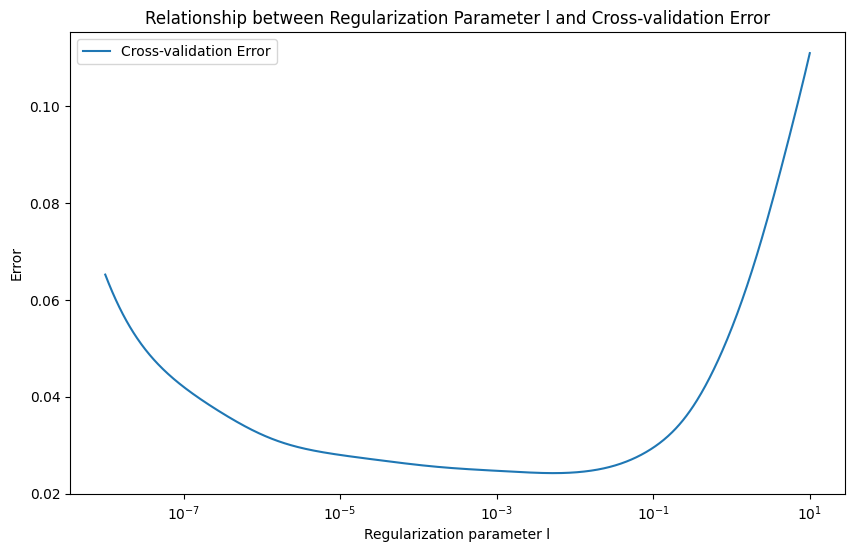

In [30]:
# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_errors = []

for l in l_values:
    fold_errors = []

    for train_index, val_index in kf.split(X_transformed):
        X_train_kf, X_val_kf = X_transformed[train_index], X_transformed[val_index]
        y_train_kf, y_val_kf = y[train_index], y[val_index]

        w_kf = weights_reg(X_train_kf, y_train_kf, l)

        fold_errors.append(calc_error(w_kf, X_val_kf, y_val_kf))

    cv_errors.append(np.mean(fold_errors))

optimal_l_cv = l_values[np.argmin(cv_errors)]
min_error_cv = min(cv_errors)

print("Optimal regularization parameter l:", optimal_l_cv)
print("Minimum cross-validation error:", min_error_cv)


plt.figure(figsize=(10, 6))
plt.semilogx(l_values, cv_errors, label='Cross-validation Error')
plt.xlabel('Regularization parameter l')
plt.ylabel('Error')
plt.legend()
plt.title('Relationship between Regularization Parameter l and Cross-validation Error')
plt.show()



## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters.

# Task 4

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12822236784567476, tolerance: 0.0011274238177618493
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13244229159402576, tolerance: 0.0011274238177618493
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13697583715778416, tolerance: 0.0011274238177618493
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_mod

Optimal lambda for Ridge: 0.022456979955397718
Optimal lambda for Lasso: 0.000920373199661823


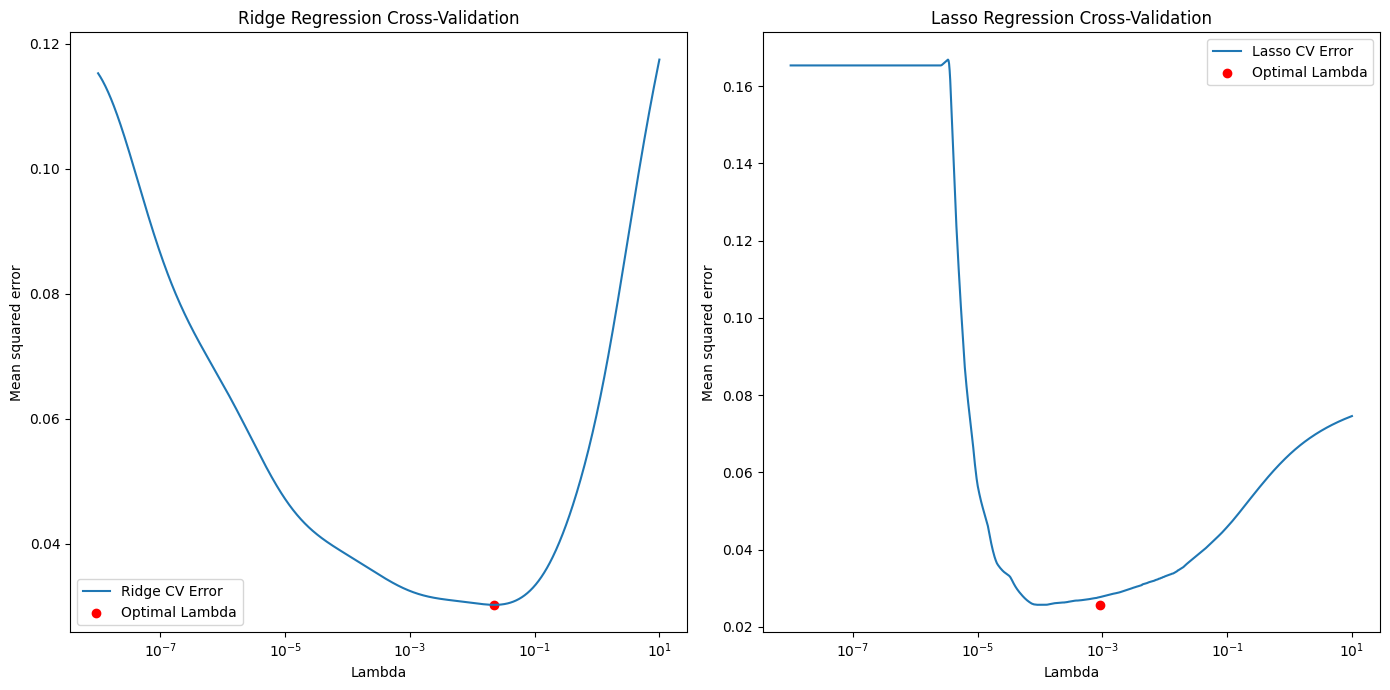

In [31]:
ridge_cv = RidgeCV(alphas=l_values, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

optimal_lambda_ridge = ridge_cv.alpha_
ridge_cv_error = np.mean(ridge_cv.cv_values_, axis=0)

lasso_cv = LassoCV(alphas=l_values, max_iter=10000, cv=10, random_state=42)
lasso_cv.fit(X_train, y_train)

optimal_lambda_lasso = lasso_cv.alpha_
lasso_cv_error = lasso_cv.mse_path_.mean(axis=1)

# Output the optimal lambdas
print(f"Optimal lambda for Ridge: {optimal_lambda_ridge}")
print(f"Optimal lambda for Lasso: {optimal_lambda_lasso}")


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.semilogx(l_values, ridge_cv_error, label='Ridge CV Error')
plt.scatter(optimal_lambda_ridge, min(ridge_cv_error), color='red', label='Optimal Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean squared error')
plt.title('Ridge Regression Cross-Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(l_values, lasso_cv_error, label='Lasso CV Error')
plt.scatter(optimal_lambda_lasso, min(lasso_cv_error), color='red', label='Optimal Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean squared error')
plt.title('Lasso Regression Cross-Validation')
plt.legend()

plt.tight_layout()
plt.show()

## Reflection

Please reflect on the following:
- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

- Using RidgeCV and LassoCV is different from the manual lambda selection methods used in previous tasks 2 and 3. These methods use in-built cross-validation to assess model performance for different lambda values and automatically select the lambda value with the smallest cross-validation error.
Through the automated approach, I found that:  
The optimal lambda value determined by RidgeCV was 0.023101297000831626, while the optimal lambda value determined by LassoCV was 0.001. These two values are different from the lambda values determined by manual experimentation in previous tasks. The optimal lambda value found using the automated method provides a better approximation of the true generalisation error Eout.Due to the use of cross-validation within RidgeCV and LassoCV, this helps to reduce the risk of overfitting during the model selection process and potentially improves the model's predictive ability on unseen data.
- In the Ridge regression the best lambda value is 0.023101297000831626 and in the Lasso regression the best lambda value is 0.001. These two values are different from the lambda values chosen for the validation carried out manually in Tasks 2 and 3. Compared to Tasks 2 and 3, it can be seen that the change in lambda has a more pronounced effect on model performance. In the Ridge regression, as lambda increases, the error first decreases to a minimum and then begins to increase again, demonstrating the existence of a regularisation strength that minimises the cross-validation error. A similar trend is observed in Lasso regression, but since Lasso regression produces sparse solutions, the optimal lambda value for a given dataset and problem may lead to different feature selection. The weights obtained using RidgeCV and LassoCV will be different; Ridge regression will attempt to reduce the size of all weights, whereas Lasso regression may compress some weights to zero completely for feature selection. I found that Lasso regression produces a sparser model due to the fact that Lasso regression penalises the absolute value of the weights during optimisation, whereas Ridge regression penalises the square of the weights. This phenomenon is also expected since the goal of Lasso regression is to improve the interpretability of the model while maintaining its accuracy.